<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Lab_6_5_Feature_Selection_010723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [ ]:
# Import Libraries

#### 1. Load Data

In [ ]:
# Read Data
diabetes_csv = 'diabetes.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
null_values = df.isnull().sum()

In [ ]:
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data_types = df.dtypes
print(data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


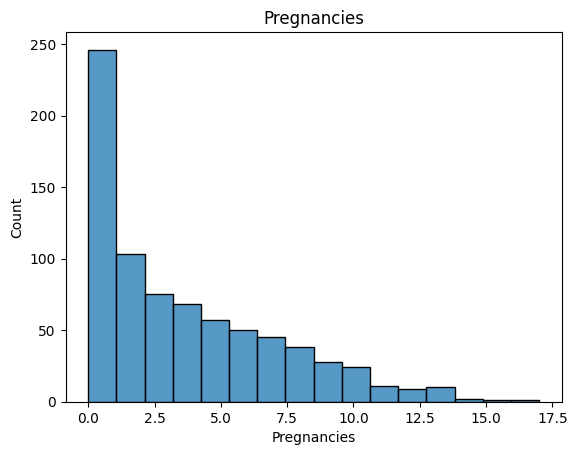

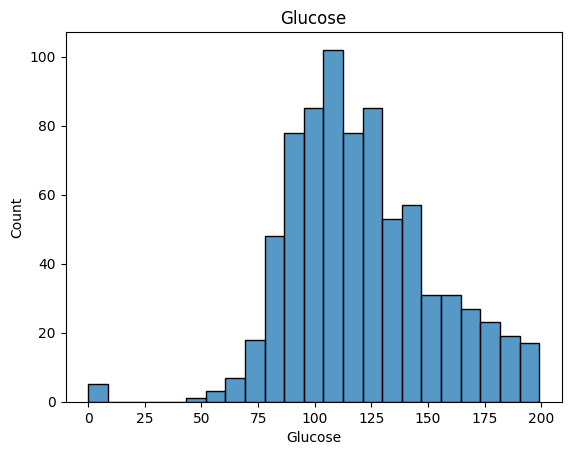

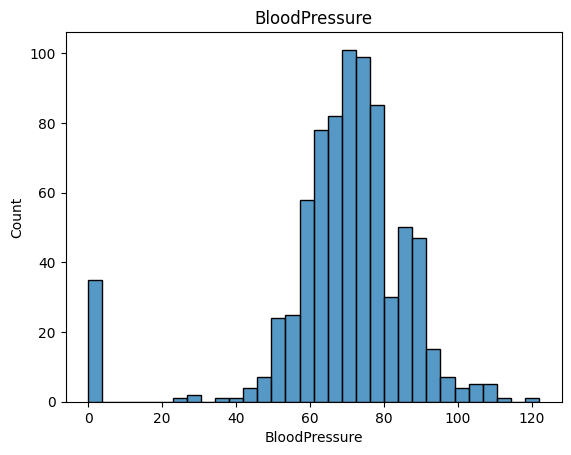

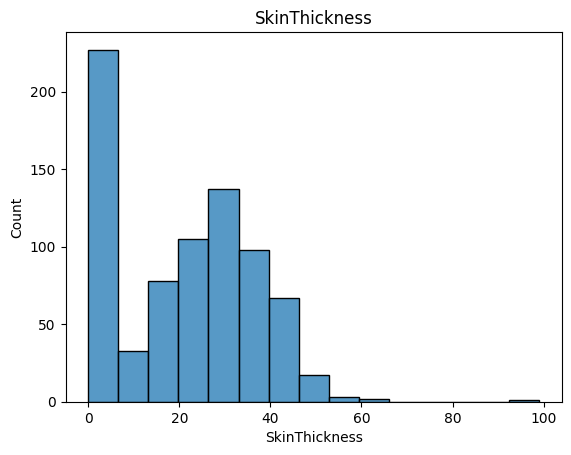

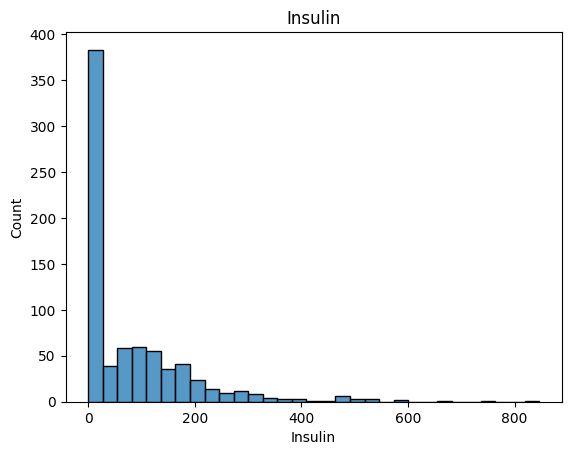

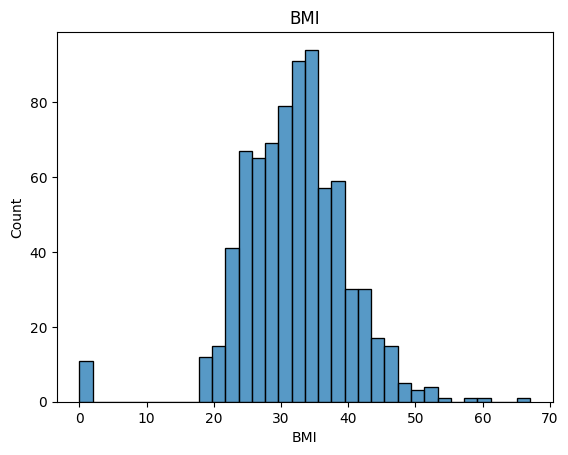

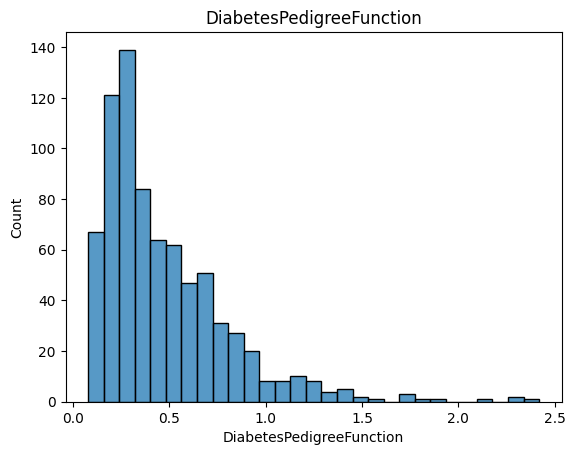

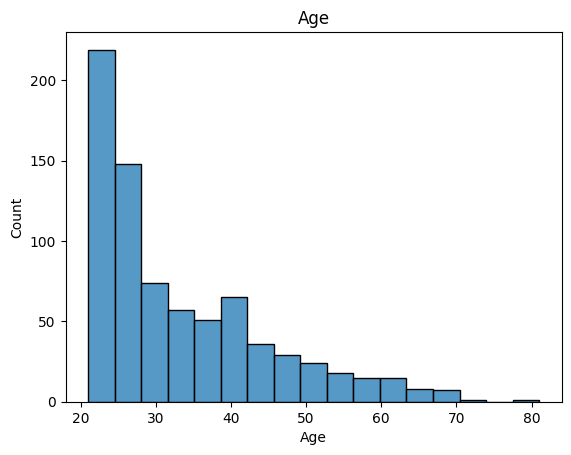

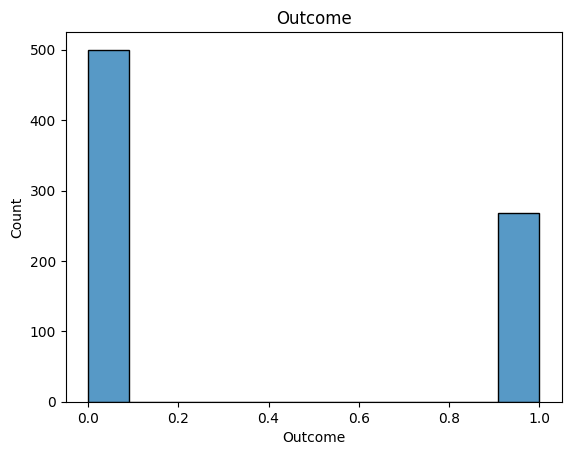

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for column in columns:
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

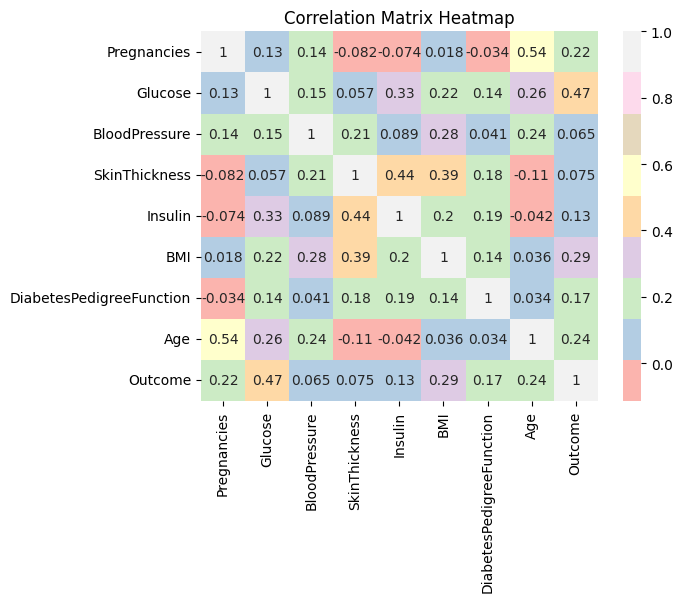

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap with baby pink color
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title("Correlation Matrix Heatmap")
plt.show()

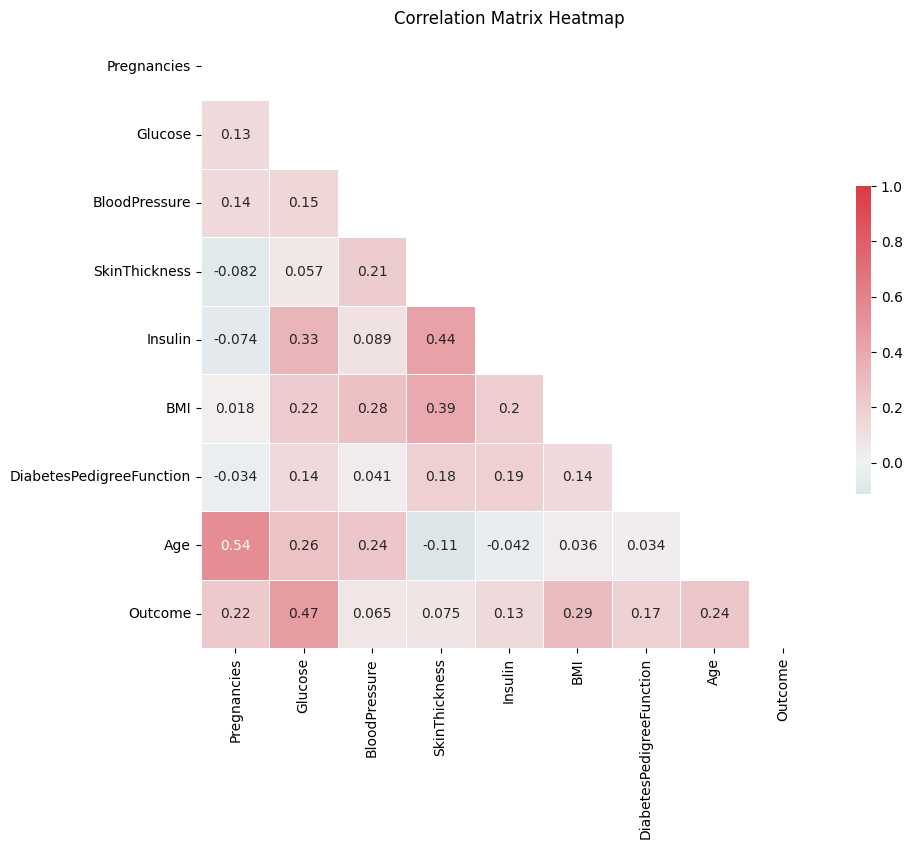

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define the colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


#### 3. Set Target

- Set `Outcome` as target.
- Set Features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

In [ ]:
target_column = 'Outcome'
feature_columns = [c for c in df.columns if c != target_column]

# Set the target variable
target = df[target_column]

# Set the feature variables
features = df[feature_columns]

In [ ]:
y = df[target_column]
X = df[feature_columns]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [ ]:
# Create an instance of SelectKBest

In [ ]:
# Fit

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Create an instance of SelectKBest
k = 4  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector to data
selector.fit(X, y)  # X represents feature variables, y represents target variable

# Print the scores
scores = selector.scores_
print("Feature Scores:")
for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score}")

# Find the top 4 features
top_features_indices = selector.get_support(indices=True)
top_features = X.columns[top_features_indices]
print("Top Features:")
print(top_features)

Feature Scores:
Pregnancies: 111.51969063588255
Glucose: 1411.887040644141
BloodPressure: 17.605373215320718
SkinThickness: 53.10803983632434
Insulin: 2175.5652729220137
BMI: 127.669343331037
DiabetesPedigreeFunction: 5.392681546971454
Age: 181.30368904430023
Top Features:
Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


In [ ]:
# Find the top 4 features
top_features_indices = selector.get_support(indices=True)
top_features = [feature_columns[idx] for idx in top_features_indices]
print("Top Features:")
print(top_features)

Top Features:
['Glucose', 'Insulin', 'BMI', 'Age']


In [ ]:
# Transform X to Features
X_selected = selector.transform(X)

# Convert the transformed features to a DataFrame
features_selected_df = pd.DataFrame(X_selected, columns=top_features)

# Print the transformed features
print("Transformed Features:")
print(features_selected_df)

Transformed Features:
     Glucose  Insulin   BMI   Age
0      148.0      0.0  33.6  50.0
1       85.0      0.0  26.6  31.0
2      183.0      0.0  23.3  32.0
3       89.0     94.0  28.1  21.0
4      137.0    168.0  43.1  33.0
..       ...      ...   ...   ...
763    101.0    180.0  32.9  63.0
764    122.0      0.0  36.8  27.0
765    121.0    112.0  26.2  30.0
766    126.0      0.0  30.1  47.0
767     93.0      0.0  30.4  23.0

[768 rows x 4 columns]


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [ ]:
# ANSWER

In [ ]:
# Print Score
# Find Features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression as the estimator
estimator = LogisticRegression()

# Create an instance of RFE with the desired number of features to select
n_features_to_select = 5  # Number of features to select
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

# Fit RFE to data
rfe.fit(X, y)  # X represents your feature variables, y represents your target variable

estimator = LogisticRegression(max_iter=1000)

# Find the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression as the estimator
model = LogisticRegression()

# Create an instance of RFE with the desired number of features to select
n_features_to_select = 4
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE to your data
fit = rfe.fit(X, y)  # X represents feature variables, y represents target variable

# Print the number of selected features
print("Num Features: %d" % fit.n_features_)

# Print a boolean mask indicating which features are selected
print("Selected Features: %s" % fit.support_)

# Print the feature ranking
print("Feature Ranking: %s" % fit.ranking_)

# Create a DataFrame to display the boolean mask of selected features
selected_features_df = pd.DataFrame(fit.support_, index=feature_columns)

# Print the DataFrame
print(selected_features_df)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 4 5 1 1 2]
                              0
Pregnancies                True
Glucose                    True
BloodPressure             False
SkinThickness             False
Insulin                   False
BMI                        True
DiabetesPedigreeFunction   True
Age                       False


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



